# Non-linear Pendulm

The pendulum is a classic physics problem that most students will see in their introductory physics classes. 
<center>

![Pendulm Force Diagram](https://upload.wikimedia.org/wikipedia/commons/6/66/Pendulum_gravity.svg)

</center>


Deriving the equation of motion for the pendulum is a strait-forward application of Newton's Laws:

$$F = ma$$

where

$$a = -gsin\theta$$

The arc length (distance the bob travels) is:

$$s = l\theta$$

which allows us to write the velocity as:

$$v = \frac{ds}{dt} = l \frac{d\theta}{dt}$$

and allows us to write the accelration as:

$$a = \frac{d^2s}{dt^2} = l \frac{d^2\theta}{dt^2}$$

Combining all of this information: 

$$l \frac{d^2\theta}{dt^2} = -gsin\theta$$

$$\frac{d^2\theta}{dt^2} + \frac {g}{l} sin\theta = 0 $$

## Small Angle Approx.

From here, if we were just trying to keep things simple, we would apply the small angle approximation ($\theta \ll 1$), allowing us to say $sin\theta \approx \theta$, producing the well known results:

$$\theta = \theta_0 cos(\sqrt{\frac{g}{l}}t)$$

and

$$T_0 = 2\pi\sqrt{\frac{l}{g}}$$

## Without Small Angle Approx.

But, because this isn't introductory physics, let's investigate the pendulum's periodic motion without the small angle approximation. 

Using potential and kinetic energy, we can write:

$$\frac{1}{2}mv^2 = mgh$$

where $h$ is the height our pendulum is at. So, the velocity is then:

$$v = \sqrt{2gh}$$

Using the arc length formula from above, we can say:

$$v = l\frac{d\theta}{dt} = \sqrt{2gh}$$

$$\frac{d\theta}{dt} = \frac{\sqrt{2gh}}{l}$$

The initial height $h_0$ of our pendulum can be written as $lcos\theta_0$, then some time later, the height will be $lcos\theta$.

The change in height is then:

$$\Delta h = l(cos\theta - cos\theta_0)$$

So, our $\frac{d\theta}{dt}$ can now be written as:

$$\frac{d\theta}{dt} = \sqrt{\frac{2g}{l}(cos\theta - cos\theta_0)}$$

From here, we can invert this equation and multiply both sides by $d\theta$:

$$dt = \frac{d\theta}{\sqrt{\frac{2g}{l}(cos\theta - cos\theta_0)}}$$

$$dt = \sqrt{\frac{l}{2g}}\frac{d\theta}{\sqrt{(cos\theta - cos\theta_0)}}$$

Finally, to get the period, we just need to integrate (note that if pick our $t_0$ to be when the pendulum is at its max height, then we can simply multipy by 4 and integrate from $\theta = 0$ to $\theta = \theta_0$):

$$T = 4\sqrt{\frac{l}{2g}}\ \int_{0}^{\theta_0} \frac{d\theta}{\sqrt{(cos\theta - cos\theta_0)}}$$

If you try to solve this equation using our numerical techniques in python, you will run into errors and it will only return `nan` values. Instead, we need to apply some trigonometric functions. However, to save some time, we will simply write the final, usable form. 

$$T = 4\sqrt{\frac{l}{g}}\ \int_{0}^{\frac{\pi}{2}} \frac{d\phi}{\sqrt{(1 - A^2sin^2\phi)}}$$

where:

$$A = sin(\frac{\theta_{0}}{2})$$

Note: this is an *eliptical integral*, in case you want to learn more.


### Our Integration Techniques
Part 1.

Using the integration techniques from Lab 4, find the period of a pendulum with mass $m = 1$kg and length $l = 1$m for all initial angles between 0 and 90 degrees. Use $N = 10, 100, 1000$, is there much difference between the integration methods?

Note: for $\theta_0 = 45\degree$, you should get $T \approx 2.08732$ seconds.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#############################################################################################
#                          Using the integral teciniques from Lab 4                         #
#############################################################################################
def gauss(f,a,b,N):
    y,wprime = np.polynomial.legendre.leggauss(N)
    x = 0.5*(y + 1)*(b - a) + a
    w = wprime* 0.5*(b-a)
    return (f(x)*w).sum()

def qsimp(f,a,b,N):
    """qsimp uses Simpson's rule to evaluate an approximation to the integral of f(x) on the interval [a, b] using N points.
    
    inputs
    ------
    f: function that can operate on numpy arrays
    a: float representing the lower limit of the integral
    b: float representing the upper limit of the integral
    N: int representing the number of samples
    
    """
    if N%2!=1 and N>=3:
        raise ValueError("Simpson's rule requires that N, the number of points be odd and at least 3.")
    h = (b-a)/(N-1) # first we define the width between each x_i
    x = a+np.arange(N)*h # np.arange(N) returns a np array; we can multiply it and add numbers to each element in it
    
    w = np.zeros(N) #initializing a weight array

    for i in range(len(x)):
        if i%2==0:
            w[i] = h *4/3 # i is even
        else:
            w[i] = h *2/3 # i is odd
    w[0] = w[-1] = h/3 # fixing end points
        
    data = f(x) # f is a function that we "pass" into the qtrap; here we have it evaluate at every point in x, 
                # storing the results in a new numpy array I called "data"
    
    # this is the actual integral: data*w is a new numpy array 
    # of the same length as data and w, which I call "integrand"
    integrand = data*w
    
    # numpy arrays can sum themeselves by calling their .sum() method:
    integral = integrand.sum()

    return integral

def qtrap(f,a,b,N):
    """qtrap evaluates the trapezoidal rule approximation to the integral of f(x) on the interval [a, b] using N points.
    
    inputs
    ------
    f: function that can operate on numpy arrays
    a: float representing the lower limit of the integral
    b: float representing the upper limit of the integral
    N: int representing the number of samples
    
    """
    h = (b-a)/(N-1) # first we define h.
    x = a+np.arange(N)*h # np.arange(N) returns a np array; we can multiply it and add numbers to each element in it
    
    w = h*np.ones(N) # this is the same trick as for x; multipying a bunch of ones from np.ones(N) by h
    # since w is 1 on all interior points, and 1/2 on the first and last, we can just do
    w[0] *= 0.5
    w[-1] *= 0.5

        
    data = f(x) # f is a function that we "pass" into the qtrap; here we have it evaluate at every point in x, 
                # storing the results in a new numpy array I called "data"
    
    # this is the actual integral: data*w is a new numpy array 
    # of the same length as data and w, which I call "integrand"
    integrand = data*w
    
    # numpy arrays can sum themeselves by calling their .sum() method:
    integral = integrand.sum()
    
    return integral
#############################################################################################
m = 1
l = 1
g = 9.8
theta_0 = np.pi/4

integral_func = lambda phi: (1-(np.sin(theta_0/2))**2*(np.sin(phi))**2)**(-.5)

T= lambda int_func_eval: 4 * (l/g)**(.5) * int_func_eval

data_to_display = []
N_ls = [10,100,1000]

for N in N_ls:
    gauss_eval = T(gauss(integral_func,0, np.pi/2,N))
    qtrap_eval = T(qtrap(integral_func,0, np.pi/2,N))
    qsimp_eval = T(qsimp(integral_func,0, np.pi/2,N+1)) # we use N+1 to make it odd->required by Simpson's Law
    data_to_display.append([N, qtrap_eval, qsimp_eval, gauss_eval])

df = pd.DataFrame(data_to_display, columns = ['N', 'Trapezoidal Method', "Simpson's Rule", "Gauss Method"])

pd.options.display.float_format = "{:,.16f}".format

display(df)

,N,Trapezoidal Method,Simpson's Rule,Gauss Method
0,10,2.0873200174795943,1.9480017374375171,2.0873200174796036
1,100,2.0873200174795938,2.0733881894753865,2.0873200174795938
2,1000,2.0873200174795943,2.0859268346791739,2.0873200174795938


Part 2.

Compare our results to the small angle approx. result: $T_0 = 2\pi\sqrt{\frac{l}{g}}$. Produce a plot showing Percent Error vs $\theta_0$

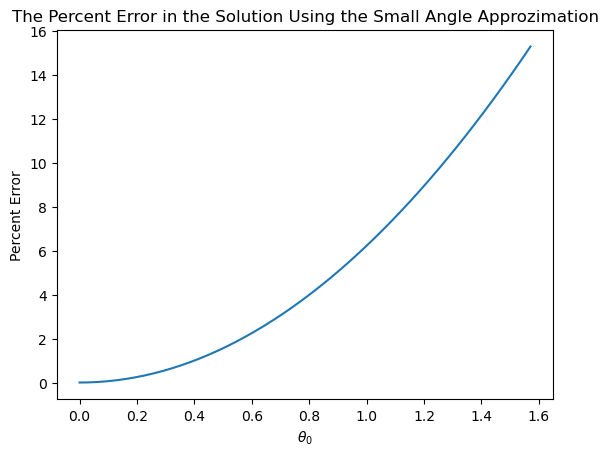

In [2]:
# The results when N is large enough are basically the same, I will use a large N and gauss's method
# to obtain a sufficiently 'true' value
T_0 = 2 * np.pi * (l/g)**(.5) # constant

theta_0_ls = np.linspace(0,np.pi/2, 50)
perc_err = []

for theta_0 in theta_0_ls:
    true = T(gauss(integral_func,0, np.pi/2,N)) # should still grab the correct theta_0
    perc_err.append(abs(T_0 - true)/true * 100)


plt.plot(theta_0_ls, perc_err)
plt.xlabel(r"$ \theta_0 $")
plt.ylabel("Percent Error")
plt.title("The Percent Error in the Solution Using the Small Angle Approzimation")
plt.show()


### Scipy Integration

If you happen to need to integrate in the future, there is a decent chance you will simply want to use one of the pre-build functions in Python to do so. 

The Scipy Library offers many great pre-built functions ready to use, just make sure you are using them correctly. It is very easy to apply a pre-build function where it is not meant to be used if you don't fully understand what the function is doing. 

Here is a link to the [scipy.integrate](https://docs.scipy.org/doc/scipy/tutorial/integrate.html) documentation page. It is worth reviewing all that is there. 

Here, we will only look at 2 integration techniques from Scipy: `quad` and `fixed_quad`.

In [3]:
import scipy.integrate as integrate
import numpy as np
import pandas as pd

start = 0
stop = np.pi

# my array for the results to go in
I = np.zeros((2,2)) 

# start with regular quad
[I[0,0], I[0,1]] = (integrate.quad(np.sin, start, stop))

# now with gauss
[I[1,0], I[1,1]] = (integrate.fixed_quad(np.sin, start, stop))

df = pd.DataFrame(I, columns =['Integral Result', 'Integral Error'], index=['quad','gauss'])
pd.options.display.float_format = "{:,.16f}".format
df

,Integral Result,Integral Error
quad,2.0000000000000000,0.0000000000000222
gauss,2.0000001102844727,NaN


When you use the function there are two outputs: the integral estimate and an estimate of the error. The documentation on the [scipy.integrate](https://docs.scipy.org/doc/scipy/tutorial/integrate.html#general-integration-quad) website doesn't go into as much detail as I'd like, but you can find a [stackoverflow](https://stackoverflow.com/questions/41662492/what-is-the-meaning-of-error-obtained-in-dblquad-integration-using-scipy) discussion about how the error is calculated. 

The important thing to take form this is while there is an error estimate, that does not mean the true result of the integral is simply +/- the estimated result. It is very possible scipy does not produce a reliable value, so make sure your results make sense! 



Using both `integrate.quad` and `integrate.fixed_quad`, calculate the period of the pendulum with mass $m = 1$kg and length $l = 1$m for all initial angles between 0 and 90 degrees. How do your results from scipy compare with our integration techniques from lab 4? 

In [6]:
m = 1
l = 1
g = 9.8
N = 1000
theta_0_degrees_ls = np.linspace(0,90, 91)
theta_0_ls = theta_0_degrees_ls * np.pi / 180 

integral_func = lambda phi: (1-(np.sin(theta_0/2))**2*(np.sin(phi))**2)**(-.5)

T= lambda int_func_eval: 4 * (l/g)**(.5) * int_func_eval

data_to_display = []

for i in range(len(theta_0_ls)):
    theta_0 = theta_0_ls[i]
    gauss_eval = T(gauss(integral_func,0, np.pi/2,N)) # integral_func should still grab the correct theta_0
    qtrap_eval = T(qtrap(integral_func,0, np.pi/2,N))
    qsimp_eval = T(qsimp(integral_func,0, np.pi/2,N+1)) # we use N+1 to make it odd->required by Simpson's Law
    scipy_quad = T(integrate.quad(integral_func, 0, np.pi/2)[0])
    scipy_fixed_quad = T(integrate.fixed_quad(integral_func, 0, np.pi/2)[0])
    data_to_display.append([int(theta_0_degrees_ls[i]), qtrap_eval, qsimp_eval, gauss_eval, scipy_quad, scipy_fixed_quad])

df = pd.DataFrame(data_to_display, columns = ['theta_0 (degrees)', 'Trapezoidal Method', "Simpson's Rule", "Gauss Method", "Scipy Quad", "Scipy Fixed Quad"])

pd.options.display.float_format = "{:,.16f}".format
pd.set_option('display.max_rows', None)
print("Comparing the Results of Different Integration Methods using N=1000 for Ours:")
display(df)

Comparing the Results of Different Integration Methods using N=1000 for Ours:


,theta_0 (degrees),Trapezoidal Method,Simpson's Rule,Gauss Method,Scipy Quad,Scipy Fixed Quad
0,0,2.0070899231544925,2.0057518632057239,2.0070899231544930,2.0070899231544930,2.0070899231544930
1,1,2.0071281359809907,2.0057900505566399,2.0071281359809907,2.0071281359809907,2.0071281359809738
2,2,2.0072427824638446,2.0059046206030477,2.0072427824638450,2.0072427824638450,2.0072427824635763
3,3,2.0074338866179295,2.0060955973307086,2.0074338866179300,2.0074338866179300,2.0074338866165680
4,4,2.0077014884840221,2.0063630207318464,2.0077014884840221,2.0077014884840221,2.0077014884797166
5,5,2.0080456441528001,2.0067069468291008,2.0080456441528005,2.0080456441528005,2.0080456441422858
6,6,2.0084664257984866,2.0071274477091099,2.0084664257984866,2.0084664257984866,2.0084664257766738
7,7,2.0089639217221720,2.0076246115657495,2.0089639217221720,2.0089639217221715,2.0089639216817443
8,8,2.0095382364048837,2.0081985427531039,2.0095382364048842,2.0095382364048842,2.0095382363358860
9,9,2.0101894905704585,2.0088493618482177,2.0101894905704585,2.0101894905704585,2.0101894904598931
